<a href="https://colab.research.google.com/github/SchachtmanLab/Transgenic-sorghum-sorgoleone/blob/master/peer_grader_assignment_01252025_PengWang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Question 1 - Extracting Tesla Stock Data Using yfinance

In [ ]:
#Using the yfinance Library to Extract Stock Data
import yfinance as yf
import pandas as pd
import json



```
Using the Ticker module we can create an object that will allow us to
access functions to extract data. To do this we need to provide the ticker
symbol for the stock, here the company is tesla and the ticker symbol is
TSLA.
```

In [ ]:
tesla = yf.Ticker("TSLA")

In [106]:
tesla_data = tesla.history(period="max")  # Fetches 1 year of data is "1y". using the history function, set the period to max or years period


In [109]:
# check the first several rows of the data
tesla_data.reset_index(inplace=True)
tesla_data.head()
# Save the stock data to a DataFrame
df_stock = pd.DataFrame(tesla_data)
# Display the DataFrame
print(df_stock)
# Convert the historical data to a dictionary
#historical_data_dict = historical_data.to_dict()
#historical_data_dict



,level_0,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,1,1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2,2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,3,3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607505,7410400,0.0,0.0
4,4,4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


#Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

Step 1: Send an HTTP request to the web page

In [ ]:
# URL for Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue.html"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

In [ ]:
#use the .text method for extracting the HTML content as a string in order to make it readable
data  = requests.get(url, headers=headers).text
#print(data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue" />
		<link rel="alternate" media="only screen and (max-width: 768px)" href="https://m.macrotrends.net/stocks/charts/GME/gamestop/revenue">
		<title>GameStop Revenue 2010-2024 | GME | MacroTrends</title>
		<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png">
		<meta name="description" content="GameStop annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of money a company receives from its customers

Step 2: Parse the HTML content

In [112]:
#parsing refers to the process of analyzing a string of text or a data structure, usually following a set of rules or grammar,
#to understand its structure and meaning.
#Parsing involves breaking down a piece of text or data into its individual components or elements, and then analyzing those components
#to extract the desired information or to understand their relationships and meanings.

#Create a new BeautifulSoup object
soup = BeautifulSoup(data, 'html.parser')
soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue" rel="canonical"/>
<link href="https://m.macrotrends.net/stocks/charts/GME/gamestop/revenue" media="only screen and (max-width: 768px)" rel="alternate"/>
<title>GameStop Revenue 2010-2024 | GME | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png" rel="icon" type="image/x-icon"/>
<meta content="GameStop annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or servic

step 3: Locate the table with the revenue data

In [ ]:
table = soup.find("table", {"class": "historical_data_table"})
table

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2023</td>
<td style="text-align:center">$96,773</td>
</tr>
<tr>
<td style="text-align:center">2022</td>
<td style="text-align:center">$81,462</td>
</tr>
<tr>
<td style="text-align:center">2021</td>
<td style="text-align:center">$53,823</td>
</tr>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$31,536</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$24,578</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$21,461</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$11,759</td>
</tr>
<tr>
<td style="text-align:center">2016</td>
<td style="text-align:center">$7,000</td>
</tr>
<tr>
<td style="text-align:center">2015</

step 4: extract the data

In [ ]:
# Extract table rows
rows = table.find_all("tr")

In [113]:
# Parse the rows to extract revenue data
revenue_data = []
for row in rows[1:]:  # Skip the header row
    cells = row.find_all("td")
    if len(cells) == 2:  # Ensure row has two columns
       fiscal_year = cells[0].text.strip()
       revenue = cells[1].text.strip()
       revenue_data.append({"Fiscal Year": fiscal_year, "Revenue": revenue})
       #print(revenue_data)
for entry in revenue_data:
    print(f"year{entry['Fiscal Year']}, revenue{entry['Revenue']}")
# Save the revenue data to a DataFrame
tesla_revenue = pd.DataFrame(revenue_data)
# Display the DataFrame
print(tesla_revenue)
tesla_revenue = tesla_revenue.sort_values("Fiscal Year")
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(int)
# Print the updated DataFrame
print(tesla_revenue)
tesla_revenue.tail()

year2024, revenue$5,273
year2023, revenue$5,927
year2022, revenue$6,011
year2021, revenue$5,090
year2020, revenue$6,466
year2019, revenue$8,285
year2018, revenue$8,547
year2017, revenue$7,965
year2016, revenue$9,364
year2015, revenue$9,296
year2014, revenue$9,040
year2013, revenue$8,887
year2012, revenue$9,551
year2011, revenue$9,474
year2010, revenue$9,078
year2009, revenue$8,806
   Fiscal Year Revenue
0         2024  $5,273
1         2023  $5,927
2         2022  $6,011
3         2021  $5,090
4         2020  $6,466
5         2019  $8,285
6         2018  $8,547
7         2017  $7,965
8         2016  $9,364
9         2015  $9,296
10        2014  $9,040
11        2013  $8,887
12        2012  $9,551
13        2011  $9,474
14        2010  $9,078
15        2009  $8,806
   Fiscal Year  Revenue
15        2009     8806
14        2010     9078
13        2011     9474
12        2012     9551
11        2013     8887
10        2014     9040
9         2015     9296
8         2016     9364
7        

,Fiscal Year,Revenue
4,2020,6466
3,2021,5090
2,2022,6011
1,2023,5927
0,2024,5273


#Question 3 - Extracting GameStop Stock Data Using yfinance

In [114]:
import yfinance as yf
import pandas as pd
import json


```
Using the Ticker module we can create an object that will allow us to
access functions to extract data. To do this we need to provide the ticker
symbol for the stock, here the company is gamestop and the ticker symbol is
GME.
```

In [ ]:
gamestop = yf.Ticker("GME")

In [115]:
gme_data = gamestop.history(period="max")  # Fetches 1 year of data. using the history function, set the period to max or years period
gme_data.head()
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


#Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

Step 1: Send an HTTP request to the web page

In [ ]:
# URL for Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue.html"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

In [ ]:
# use the .text method for extracting the HTML content as a string in order to make it readable
data  = requests.get(url, headers=headers).text
#print(data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue" />
		<link rel="alternate" media="only screen and (max-width: 768px)" href="https://m.macrotrends.net/stocks/charts/GME/gamestop/revenue">
		<title>GameStop Revenue 2010-2024 | GME | MacroTrends</title>
		<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png">
		<meta name="description" content="GameStop annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of money a company receives from its customers

step 2:  Parse the HTML content

In [ ]:
#parsing refers to the process of analyzing a string of text or a data structure, usually following a set of rules or grammar, to understand its structure and meaning.
#Parsing involves breaking down a piece of text or data into its individual components or elements, and then analyzing those components to extract the desired information or to understand their relationships and meanings.

#Create a new BeautifulSoup object
soup = BeautifulSoup(data, 'html.parser')
soup
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue" rel="canonical"/>
  <link href="https://m.macrotrends.net/stocks/charts/GME/gamestop/revenue" media="only screen and (max-width: 768px)" rel="alternate"/>
  <title>
   GameStop Revenue 2010-2024 | GME | MacroTrends
  </title>
  <link href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png" rel="icon" type="image/x-icon"/>
  <meta content="GameStop annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sal

step 3: Locate the table with the revenue data

In [ ]:
table = soup.find("table", {"class": "historical_data_table"})
table

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">GameStop Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2024</td>
<td style="text-align:center">$5,273</td>
</tr>
<tr>
<td style="text-align:center">2023</td>
<td style="text-align:center">$5,927</td>
</tr>
<tr>
<td style="text-align:center">2022</td>
<td style="text-align:center">$6,011</td>
</tr>
<tr>
<td style="text-align:center">2021</td>
<td style="text-align:center">$5,090</td>
</tr>
<tr>
<td style="text-align:center">2020</td>
<td style="text-align:center">$6,466</td>
</tr>
<tr>
<td style="text-align:center">2019</td>
<td style="text-align:center">$8,285</td>
</tr>
<tr>
<td style="text-align:center">2018</td>
<td style="text-align:center">$8,547</td>
</tr>
<tr>
<td style="text-align:center">2017</td>
<td style="text-align:center">$7,965</td>
</tr>
<tr>
<td style="text-align:center">2016</td>


step 4: extract the data

In [116]:
# Extract table rows
rows = table.find_all("tr")
# Parse the rows to extract revenue data
revenue_data = []
for row in rows[1:]:  # Skip the header row
    cells = row.find_all("td")
    if len(cells) == 2:  # Ensure row has two columns
       fiscal_year = cells[0].text.strip()
       revenue = cells[1].text.strip()
       revenue_data.append({"Fiscal Year": fiscal_year, "Revenue": revenue})
       #print(revenue_data)
for entry in revenue_data:
    print(f"year{entry['Fiscal Year']}, revenue{entry['Revenue']}")
# Save the revenue data to a DataFrame
gme_revenue = pd.DataFrame(revenue_data)
# Display the DataFrame
print(gme_revenue)
gme_revenue = gme_revenue.sort_values("Fiscal Year")
gme_revenue['Revenue'] = gme_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(int)
# Print the updated DataFrame
print(gme_revenue)
gme_revenue.tail()

year2024, revenue$5,273
year2023, revenue$5,927
year2022, revenue$6,011
year2021, revenue$5,090
year2020, revenue$6,466
year2019, revenue$8,285
year2018, revenue$8,547
year2017, revenue$7,965
year2016, revenue$9,364
year2015, revenue$9,296
year2014, revenue$9,040
year2013, revenue$8,887
year2012, revenue$9,551
year2011, revenue$9,474
year2010, revenue$9,078
year2009, revenue$8,806
   Fiscal Year Revenue
0         2024  $5,273
1         2023  $5,927
2         2022  $6,011
3         2021  $5,090
4         2020  $6,466
5         2019  $8,285
6         2018  $8,547
7         2017  $7,965
8         2016  $9,364
9         2015  $9,296
10        2014  $9,040
11        2013  $8,887
12        2012  $9,551
13        2011  $9,474
14        2010  $9,078
15        2009  $8,806
   Fiscal Year  Revenue
15        2009     8806
14        2010     9078
13        2011     9474
12        2012     9551
11        2013     8887
10        2014     9040
9         2015     9296
8         2016     9364
7        

,Fiscal Year,Revenue
4,2020,6466
3,2021,5090
2,2022,6011
1,2023,5927
0,2024,5273


#Question 5 - Tesla Stock and Revenue Dashboard

step 1, get Tesla stock data

In [ ]:
#Using the yfinance Library to Extract Stock Data
import yfinance as yf
import pandas as pd
import json
#Using the Ticker module we can create an object
tesla = yf.Ticker("TSLA")
historical_data = tesla.history(period="max")
historical_data.reset_index(inplace=True)
historical_data.head()
# Save the stock data to a DataFrame
df_stock = pd.DataFrame(historical_data)
# Display the DataFrame
print(df_stock)

                          Date        Open        High         Low  \
0    2010-06-29 00:00:00-04:00    1.266667    1.666667    1.169333   
1    2010-06-30 00:00:00-04:00    1.719333    2.028000    1.553333   
2    2010-07-01 00:00:00-04:00    1.666667    1.728000    1.351333   
3    2010-07-02 00:00:00-04:00    1.533333    1.540000    1.247333   
4    2010-07-06 00:00:00-04:00    1.333333    1.333333    1.055333   
...                        ...         ...         ...         ...   
3662 2025-01-17 00:00:00-05:00  421.500000  439.739990  419.750000   
3663 2025-01-21 00:00:00-05:00  432.640015  433.200012  406.309998   
3664 2025-01-22 00:00:00-05:00  416.809998  428.000000  414.589996   
3665 2025-01-23 00:00:00-05:00  416.059998  420.730011  408.950012   
3666 2025-01-24 00:00:00-05:00  414.450012  418.880005  405.779999   

           Close     Volume  Dividends  Stock Splits  
0       1.592667  281494500        0.0           0.0  
1       1.588667  257806500        0.0           

step 2 get Tesla Revenue

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
#URL for Tesla revenue data
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue.html"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
#use the .text method for extracting the HTML content as a string in order to make it readable
data  = requests.get(url, headers=headers).text
#print(data)
#Parse the HTML content
soup = BeautifulSoup(data, 'html.parser')
soup
#print(soup.prettify())
#Locate the table with the revenue data
table = soup.find("table", {"class": "historical_data_table"})
table
#extract the data
rows = table.find_all("tr") #Extract table rows
# Parse the rows to extract revenue data
revenue_data = []
for row in rows[1:]:  # Skip the header row
    cells = row.find_all("td")
    if len(cells) == 2:  # Ensure row has two columns
       fiscal_year = cells[0].text.strip()
       revenue = cells[1].text.strip()
       revenue_data.append({"Fiscal Year": fiscal_year, "Revenue": revenue})
       #print(revenue_data)
# Save the revenue data to a DataFrame
df_revenue = pd.DataFrame(revenue_data)
# Display the DataFrame
print(df_revenue)
df_revenue_sorted = df_revenue.sort_values("Fiscal Year")
df_revenue_sorted['Revenue'] = df_revenue_sorted['Revenue'].replace('[\$,]', '', regex=True).astype(int)
# Print the updated DataFrame
print(df_revenue_sorted)

   Fiscal Year  Revenue
0         2023  $96,773
1         2022  $81,462
2         2021  $53,823
3         2020  $31,536
4         2019  $24,578
5         2018  $21,461
6         2017  $11,759
7         2016   $7,000
8         2015   $4,046
9         2014   $3,198
10        2013   $2,013
11        2012     $413
12        2011     $204
13        2010     $117
14        2009     $112
   Fiscal Year  Revenue
14        2009      112
13        2010      117
12        2011      204
11        2012      413
10        2013     2013
9         2014     3198
8         2015     4046
7         2016     7000
6         2017    11759
5         2018    21461
4         2019    24578
3         2020    31536
2         2021    53823
1         2022    81462
0         2023    96773


step 3 plot the two dataset by seaborn

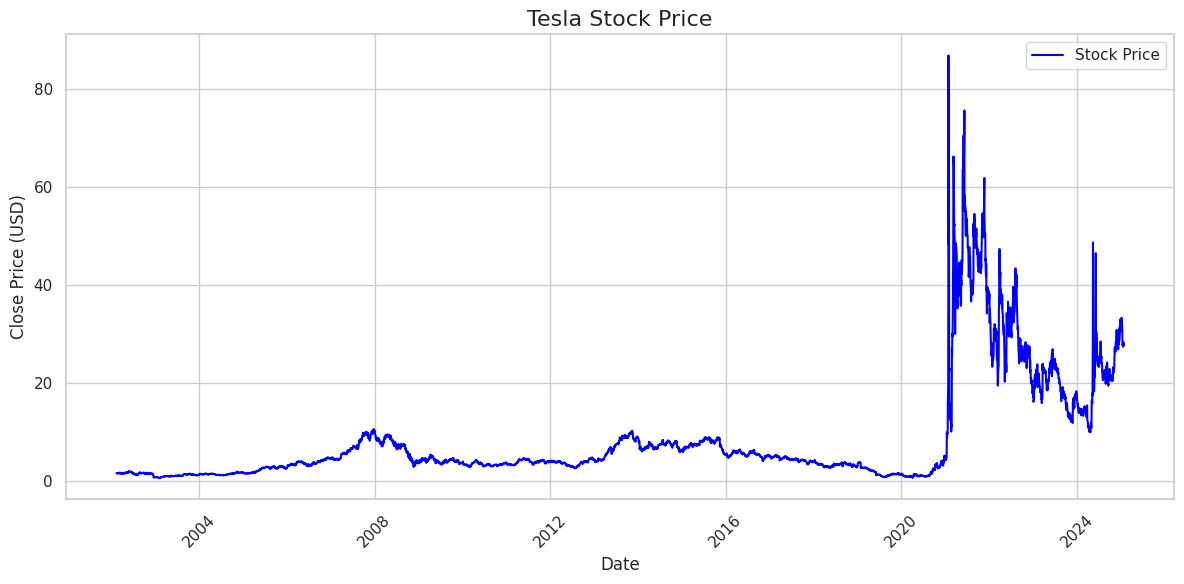

<ipython-input-127-f36d88a5a38e>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




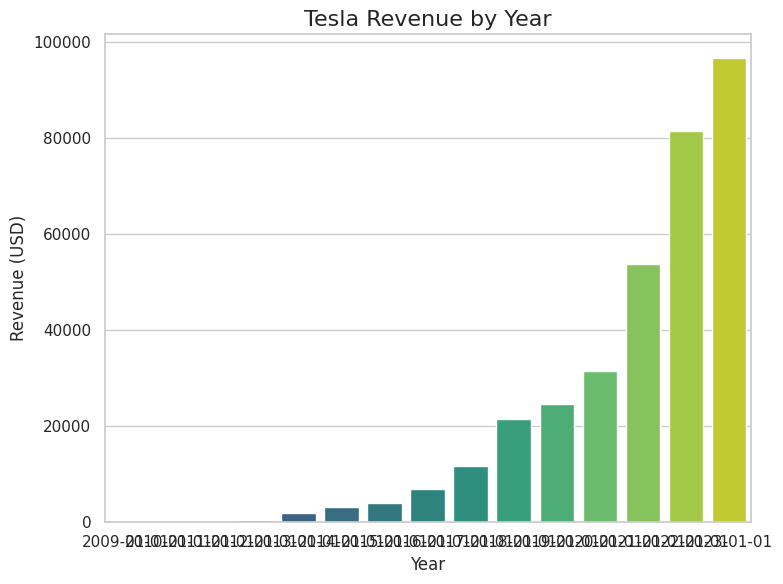

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a theme for the plots
sns.set_theme(style="whitegrid")

# Plot Tesla stock data (Closing Price)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_stock, x="Date", y="Close", color="blue", label="Stock Price")
plt.title("Tesla Stock Price", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price (USD)", fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plot Tesla revenue data (Bar Plot)
plt.figure(figsize=(8, 6))
sns.barplot(data=df_revenue_sorted, x="Fiscal Year", y="Revenue", palette="viridis")
plt.title("Tesla Revenue by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Revenue (USD)", fontsize=12)
plt.tight_layout()
plt.show()

#Plot Tesla Stock Graph by ake_graph function

In [124]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Define the make_graph function
def make_graph(stock_data, revenue_data, stock):
    # Convert 'Date' in stock_data to datetime
    stock_data["Date"] = pd.to_datetime(stock_data["Date"])
    # Convert 'Fiscal Year' in revenue_data to datetime
    revenue_data["Fiscal Year"] = pd.to_datetime(revenue_data["Fiscal Year"], format="%Y")

    # Filter data to match specified date ranges
    stock_data_specific = stock_data[stock_data["Date"] <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data["Fiscal Year"] <= '2021-04-30']

    # Create the figure with two subplots
    fig = make_subplots(
        rows=2, cols=1, shared_xaxes=True,
        subplot_titles=("Historical Share Price", "Historical Revenue"),
        vertical_spacing=0.3
    )

    # Add stock price data to the first subplot
    fig.add_trace(
        go.Scatter(
            x=stock_data_specific["Date"],
            y=stock_data_specific["Close"].astype("float"),
            name="Share Price"
        ),
        row=1, col=1
    )

    # Add revenue data to the second subplot
    fig.add_trace(
        go.Scatter(
            x=revenue_data_specific["Fiscal Year"],
            y=revenue_data_specific["Revenue"].astype("float"),
            name="Revenue"
        ),
        row=2, col=1
    )

    # Update x-axis and y-axis titles
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)

    # Update the layout
    fig.update_layout(
        showlegend=False,
        height=900,
        title=stock,
        xaxis_rangeslider_visible=True
    )

    # Show the plot
    fig.show()

# Call the function
make_graph(df_stock, df_revenue_sorted, "Tesla")


#Question 6 - GameStop Stock and Revenue Dashboard- 2 Points

step 1, get GameStop stock data

In [ ]:
#Using the yfinance Library to Extract Stock Data
import yfinance as yf
import pandas as pd
import json
#Using the Ticker module we can create an object
gamestop = yf.Ticker("GME")
historical_data = gamestop.history(period="max")
historical_data.reset_index(inplace=True)
historical_data.head()
# Save the stock data to a DataFrame
df_stock_GME = pd.DataFrame(historical_data)
# Display the DataFrame
print(df_stock_GME)

                          Date       Open       High        Low      Close  \
0    2002-02-13 00:00:00-05:00   1.620128   1.693350   1.603296   1.691667   
1    2002-02-14 00:00:00-05:00   1.712707   1.716074   1.670626   1.683250   
2    2002-02-15 00:00:00-05:00   1.683251   1.687459   1.658002   1.674834   
3    2002-02-19 00:00:00-05:00   1.666417   1.666417   1.578047   1.607504   
4    2002-02-20 00:00:00-05:00   1.615921   1.662210   1.603296   1.662210   
...                        ...        ...        ...        ...        ...   
5770 2025-01-17 00:00:00-05:00  27.610001  28.790001  27.020000  27.510000   
5771 2025-01-21 00:00:00-05:00  27.400000  27.570000  26.330000  27.469999   
5772 2025-01-22 00:00:00-05:00  27.360001  28.020000  27.299999  27.650000   
5773 2025-01-23 00:00:00-05:00  27.879999  29.260000  27.680000  28.330000   
5774 2025-01-24 00:00:00-05:00  28.299999  28.670000  27.620001  27.770000   

        Volume  Dividends  Stock Splits  
0     76216000       

step 2, get GameStop revenue data

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
#URL for GameStop revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue.html"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}
#use the .text method for extracting the HTML content as a string in order to make it readable
data  = requests.get(url, headers=headers).text
#print(data)
#Parse the HTML content
soup = BeautifulSoup(data, 'html.parser')
soup
#print(soup.prettify())
#Locate the table with the revenue data
table = soup.find("table", {"class": "historical_data_table"})
table
#extract the data
rows = table.find_all("tr") #Extract table rows
# Parse the rows to extract revenue data
revenue_data = []
for row in rows[1:]:  # Skip the header row
    cells = row.find_all("td")
    if len(cells) == 2:  # Ensure row has two columns
       fiscal_year = cells[0].text.strip()
       revenue = cells[1].text.strip()
       revenue_data.append({"Fiscal Year": fiscal_year, "Revenue": revenue})
       #print(revenue_data)
# Save the revenue data to a DataFrame
df_revenue = pd.DataFrame(revenue_data)
# Display the DataFrame
print(df_revenue)
df_revenue_sorted_GME = df_revenue.sort_values("Fiscal Year")
df_revenue_sorted_GME['Revenue'] = df_revenue_sorted_GME['Revenue'].replace('[\$,]', '', regex=True).astype(int)
# Print the updated DataFrame
print(df_revenue_sorted_GME)

   Fiscal Year Revenue
0         2024  $5,273
1         2023  $5,927
2         2022  $6,011
3         2021  $5,090
4         2020  $6,466
5         2019  $8,285
6         2018  $8,547
7         2017  $7,965
8         2016  $9,364
9         2015  $9,296
10        2014  $9,040
11        2013  $8,887
12        2012  $9,551
13        2011  $9,474
14        2010  $9,078
15        2009  $8,806
   Fiscal Year  Revenue
15        2009     8806
14        2010     9078
13        2011     9474
12        2012     9551
11        2013     8887
10        2014     9040
9         2015     9296
8         2016     9364
7         2017     7965
6         2018     8547
5         2019     8285
4         2020     6466
3         2021     5090
2         2022     6011
1         2023     5927
0         2024     5273


step 3 plot the two dataset by seaborn

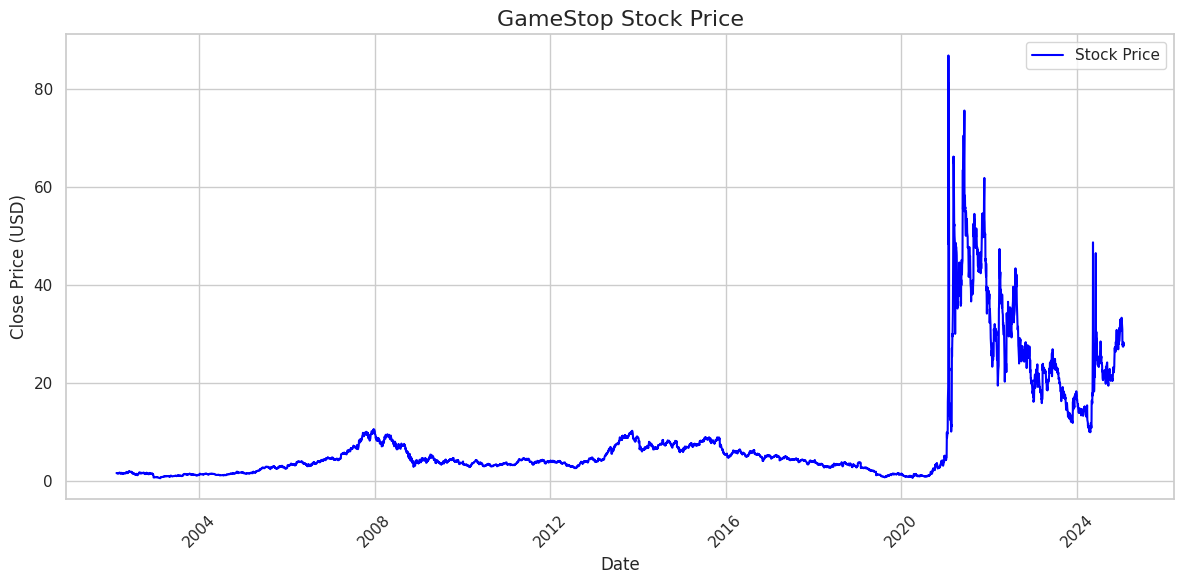

<ipython-input-126-935bd49ebf55>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




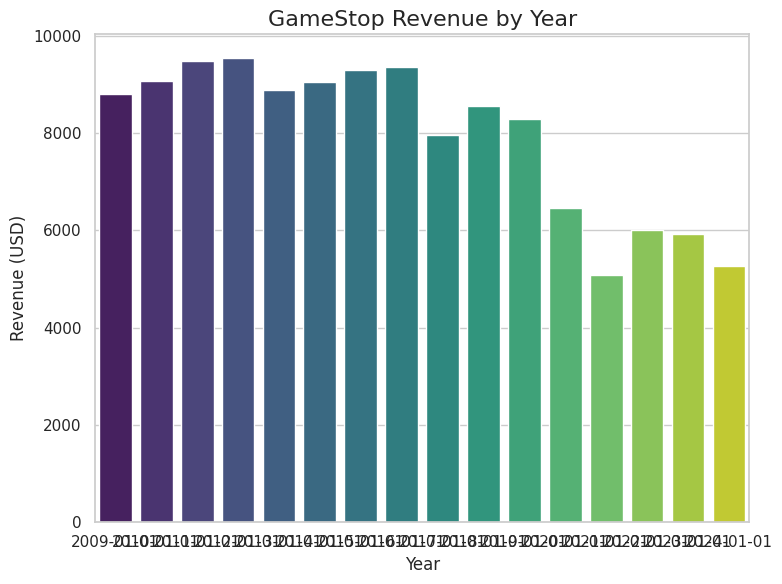

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a theme for the plots
sns.set_theme(style="whitegrid")

# Plot GameStop stock data (Closing Price)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_stock_GME, x="Date", y="Close", color="blue", label="Stock Price")
plt.title("GameStop Stock Price", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price (USD)", fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Plot GameStop revenue data (Bar Plot)
plt.figure(figsize=(8, 6))
sns.barplot(data=df_revenue_sorted_GME, x="Fiscal Year", y="Revenue", palette="viridis")
plt.title("GameStop Revenue by Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Revenue (USD)", fontsize=12)
plt.tight_layout()
plt.show()

#Plot GameStop Stock Graph by ake_graph function

In [125]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Define the make_graph function
def make_graph(stock_data, revenue_data, stock):
    # Convert 'Date' in stock_data to datetime
    stock_data["Date"] = pd.to_datetime(stock_data["Date"])
    # Convert 'Fiscal Year' in revenue_data to datetime
    revenue_data["Fiscal Year"] = pd.to_datetime(revenue_data["Fiscal Year"], format="%Y")

    # Filter data to match specified date ranges
    stock_data_specific = stock_data[stock_data["Date"] <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data["Fiscal Year"] <= '2021-04-30']

    # Create the figure with two subplots
    fig = make_subplots(
        rows=2, cols=1, shared_xaxes=True,
        subplot_titles=("Historical Share Price", "Historical Revenue"),
        vertical_spacing=0.3
    )

    # Add stock price data to the first subplot
    fig.add_trace(
        go.Scatter(
            x=stock_data_specific["Date"],
            y=stock_data_specific["Close"].astype("float"),
            name="Share Price"
        ),
        row=1, col=1
    )

    # Add revenue data to the second subplot
    fig.add_trace(
        go.Scatter(
            x=revenue_data_specific["Fiscal Year"],
            y=revenue_data_specific["Revenue"].astype("float"),
            name="Revenue"
        ),
        row=2, col=1
    )

    # Update x-axis and y-axis titles
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)

    # Update the layout
    fig.update_layout(
        showlegend=False,
        height=900,
        title=stock,
        xaxis_rangeslider_visible=True
    )

    # Show the plot
    fig.show()

# Call the function
make_graph(df_stock_GME, df_revenue_sorted_GME, "GameStop")